We use torch.nn.optim.Adam to approximate a region of sin function

torch.Size([3000, 1])


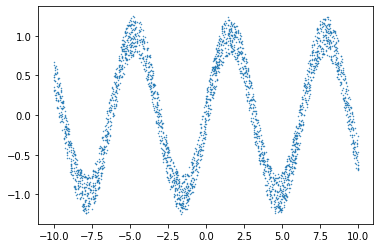

loss: tensor(27777.1875, grad_fn=<SumBackward0>)
loss: tensor(97.9330, grad_fn=<SumBackward0>)
loss: tensor(48.6794, grad_fn=<SumBackward0>)
loss: tensor(52.1645, grad_fn=<SumBackward0>)
loss: tensor(37.2142, grad_fn=<SumBackward0>)
loss: tensor(40.7736, grad_fn=<SumBackward0>)
loss: tensor(33.6223, grad_fn=<SumBackward0>)
loss: tensor(22.4397, grad_fn=<SumBackward0>)
loss: tensor(24.1454, grad_fn=<SumBackward0>)
loss: tensor(19.6557, grad_fn=<SumBackward0>)
loss: tensor(18.3226, grad_fn=<SumBackward0>)
loss: tensor(16.2849, grad_fn=<SumBackward0>)
loss: tensor(11.9650, grad_fn=<SumBackward0>)
loss: tensor(16.7769, grad_fn=<SumBackward0>)
loss: tensor(12.3546, grad_fn=<SumBackward0>)
loss: tensor(11.2209, grad_fn=<SumBackward0>)
loss: tensor(9.8826, grad_fn=<SumBackward0>)
loss: tensor(8.8363, grad_fn=<SumBackward0>)
loss: tensor(8.0989, grad_fn=<SumBackward0>)
loss: tensor(8.1073, grad_fn=<SumBackward0>)


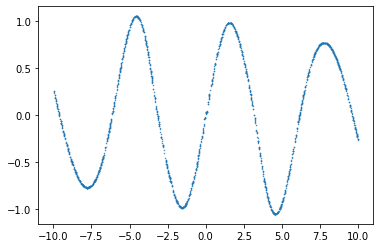

In [18]:
import torch
import matplotlib.pyplot as plt
import random
import torch.nn as nn
import torch.optim as optim

n_example = 3000
x_example = torch.rand(n_example, 1) * 20 - 10
y_example = torch.sin(x_example) + torch.rand(n_example, 1) / 2 - 0.25
print(x_example.shape)

plt.scatter(x_example.numpy(), y_example.numpy(), marker='o', s=0.2)
plt.show()

h1 = torch.randn(1, 64, requires_grad = True)
h2 = torch.randn(64, 64, requires_grad = True)
h3 = torch.randn(64, 1, requires_grad = True)

optimizer = optim.Adam([h1, h2, h3], lr=0.0001)

for it in range(10000):
    batch_size = 200
    optimizer.zero_grad()
    x_train_batch = torch.rand(batch_size, 1) * 20 - 10
    y_train_batch = torch.sin(x_train_batch) + torch.rand(batch_size, 1) / 2 - 0.25
    y_predict_batch = x_train_batch.mm(h1).tanh().mm(h2).tanh().mm(h3)
    loss = torch.pow(y_predict_batch -  y_train_batch, 2).sum()
    loss.backward()
    if it % 500 == 0:
        print('loss:', loss)
    optimizer.step()
    
n_test = 2000
with torch.no_grad():
    x_test = torch.rand(n_test, 1) * 20 - 10
    y_test_predict = x_test.mm(h1).tanh().mm(h2).tanh().mm(h3)
    plt.clf()
    plt.scatter(x_test.numpy(), y_test_predict.numpy(), marker='o', s=0.2)
    plt.show()

We use our own optimizer to approximate a region of sin function

In [ ]:
import torch
import matplotlib.pyplot as plt
import random
import torch.nn as nn

n_example = 3000
x_example = torch.rand(n_example, 1) * 20 - 10
y_example = torch.sin(x_example) + torch.rand(n_example, 1) / 2 - 0.25
print(x_example.shape)

plt.scatter(x_example.numpy(), y_example.numpy(), marker='o', s=0.2)
plt.show()

h1 = torch.randn(1, 64, requires_grad = True)
h2 = torch.randn(64, 64, requires_grad = True)
h3 = torch.randn(64, 1, requires_grad = True)

for it in range(10000):
    batch_size = 200
    x_train_batch = torch.rand(batch_size, 1) * 20 - 10
    y_train_batch = torch.sin(x_train_batch) + torch.rand(batch_size, 1) / 2 - 0.25
    y_predict_batch = x_train_batch.mm(h1).tanh().mm(h2).tanh().mm(h3)
    loss = torch.pow(y_predict_batch -  y_train_batch, 2).sum()
    loss.backward()
    if it % 500 == 0:
        print('loss:', loss)
    learning_rate = 0.00001
    with torch.no_grad():
        h1 -= h1.grad * learning_rate
        h2 -= h2.grad * learning_rate
        h3 -= h3.grad * learning_rate
        
        h1.grad.zero_()
        h2.grad.zero_()
        h3.grad.zero_()

n_test = 2000
with torch.no_grad():
    x_test = torch.rand(n_test, 1) * 20 - 10
    y_test_predict = x_test.mm(h1).tanh().mm(h2).tanh().mm(h3)
    plt.clf()
    plt.scatter(x_test.numpy(), y_test_predict.numpy(), marker='o', s=0.2)
    plt.show()

In [ ]:
We approximate cos.
One important notice: sigmoid is much better than tanh

torch.Size([3000, 1])


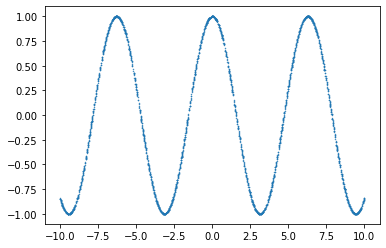

loss: tensor(21747.1465, grad_fn=<SumBackward0>)
loss: tensor(2134.1028, grad_fn=<SumBackward0>)
loss: tensor(107.5058, grad_fn=<SumBackward0>)
loss: tensor(102.8598, grad_fn=<SumBackward0>)
loss: tensor(104.8705, grad_fn=<SumBackward0>)
loss: tensor(85.2564, grad_fn=<SumBackward0>)
loss: tensor(77.6340, grad_fn=<SumBackward0>)
loss: tensor(78.1477, grad_fn=<SumBackward0>)
loss: tensor(83.3595, grad_fn=<SumBackward0>)
loss: tensor(73.5367, grad_fn=<SumBackward0>)
loss: tensor(62.7275, grad_fn=<SumBackward0>)
loss: tensor(61.7048, grad_fn=<SumBackward0>)
loss: tensor(70.1914, grad_fn=<SumBackward0>)
loss: tensor(58.4971, grad_fn=<SumBackward0>)
loss: tensor(51.2689, grad_fn=<SumBackward0>)
loss: tensor(54.7309, grad_fn=<SumBackward0>)
loss: tensor(46.7694, grad_fn=<SumBackward0>)
loss: tensor(40.5834, grad_fn=<SumBackward0>)
loss: tensor(35.2590, grad_fn=<SumBackward0>)
loss: tensor(31.4328, grad_fn=<SumBackward0>)
loss: tensor(26.7675, grad_fn=<SumBackward0>)
loss: tensor(22.7536, grad

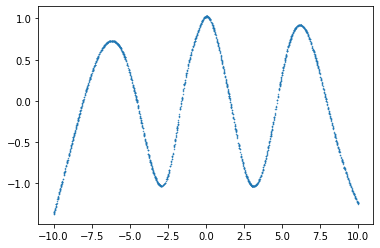

In [28]:
import torch
import matplotlib.pyplot as plt
import random
import torch.nn as nn
import torch.optim as optim

n_example = 3000
x_example = torch.rand(n_example, 1) * 20 - 10
y_example = torch.cos(x_example)
print(x_example.shape)

plt.scatter(x_example.numpy(), y_example.numpy(), marker='o', s=0.2)
plt.show()

h1 = torch.randn(1, 64, requires_grad = True)
h2 = torch.randn(64, 64, requires_grad = True)
h3 = torch.randn(64, 1, requires_grad = True)

optimizer = optim.Adam([h1, h2, h3], lr=0.0001)

for it in range(20000):
    batch_size = 200
    optimizer.zero_grad()
    x_train_batch = torch.rand(batch_size, 1) * 20 - 10
    y_train_batch = torch.cos(x_train_batch)
    # sigmoid is much better than tanh when we approximate cos instead of sin
    y_predict_batch = x_train_batch.mm(h1).sigmoid().mm(h2).sigmoid().mm(h3)
    loss = torch.pow(y_predict_batch -  y_train_batch, 2).sum()
    loss.backward()
    if it % 500 == 0:
        print('loss:', loss)
    optimizer.step()
    
n_test = 2000
with torch.no_grad():
    x_test = torch.rand(n_test, 1) * 20 - 10
    y_test_predict = x_test.mm(h1).sigmoid().mm(h2).sigmoid().mm(h3)
    plt.clf()
    plt.scatter(x_test.numpy(), y_test_predict.numpy(), marker='o', s=0.2)
    plt.show()